In [1]:
import pandas as pd
import math
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
from sklearn.cluster import KMeans

In [2]:
# 判斷是否為假日
def is_weekend(day):
    # 星期日：day % 7 == 0，星期六：day % 7 == 6
    return (day % 7 == 0) or (day % 7 == 6)

In [3]:
df = pd.read_csv('D:/HUMOB/kumamoto_Dchallengedata.csv')
# df = pd.read_csv('D:/HUMOB/kumamoto_Dchallengedata.csv')
test_df = df[df['d'].apply(is_weekend)]  # 篩選出假日資料
test_df = test_df[test_df['uid'] < 3000]  # 取前3000筆用戶
test_df = test_df[test_df['d'] < 60]  # 篩選出1~60天的資料
test_df['coordinate'] = list(zip(test_df['x'], test_df['y'])) # 結合XY座標

### 熱區圖

In [5]:
cor = list(test_df['coordinate'])
cor_freq = Counter(cor)
cor_freq.most_common(50)

[((101, 103), 2035),
 ((101, 102), 1983),
 ((100, 102), 1287),
 ((42, 80), 1106),
 ((113, 117), 996),
 ((104, 111), 990),
 ((101, 101), 975),
 ((112, 117), 974),
 ((111, 117), 972),
 ((150, 57), 970),
 ((111, 115), 964),
 ((97, 92), 954),
 ((42, 83), 922),
 ((98, 113), 914),
 ((74, 69), 899),
 ((94, 98), 889),
 ((97, 101), 884),
 ((135, 122), 872),
 ((30, 1), 861),
 ((105, 113), 857),
 ((98, 115), 856),
 ((99, 33), 850),
 ((97, 121), 843),
 ((136, 48), 841),
 ((97, 96), 840),
 ((112, 118), 838),
 ((100, 100), 819),
 ((50, 103), 801),
 ((186, 72), 795),
 ((148, 51), 792),
 ((106, 113), 787),
 ((72, 97), 781),
 ((148, 56), 781),
 ((105, 112), 780),
 ((109, 113), 776),
 ((119, 110), 774),
 ((111, 108), 772),
 ((103, 113), 771),
 ((88, 109), 760),
 ((182, 74), 760),
 ((101, 104), 751),
 ((96, 104), 750),
 ((102, 103), 749),
 ((115, 109), 748),
 ((191, 44), 748),
 ((192, 24), 748),
 ((83, 121), 743),
 ((199, 61), 743),
 ((38, 81), 742),
 ((93, 97), 735)]

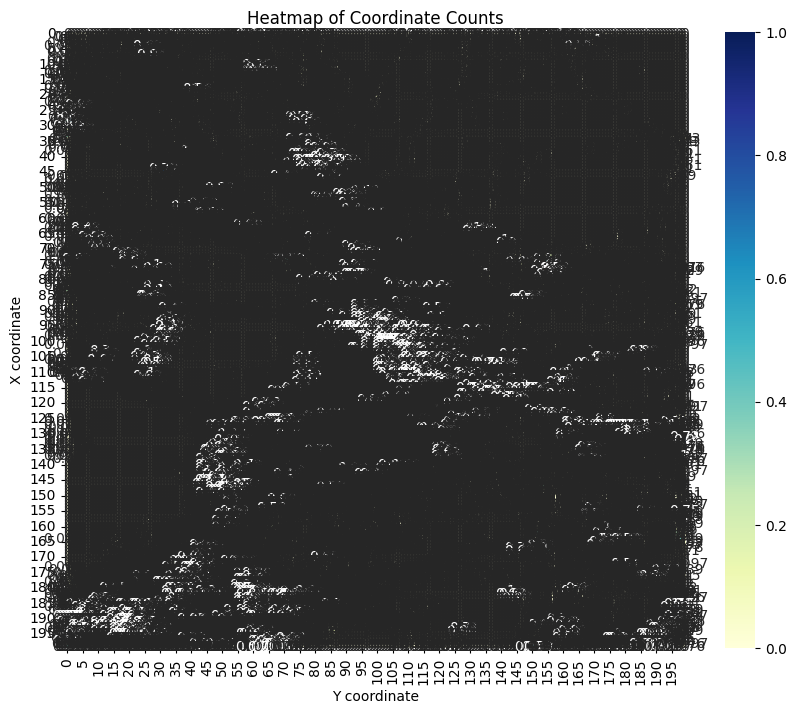

In [6]:
# 提取所有的 x 和 y 座標
x_coords = [coord[0] for coord in cor_freq.keys()]
y_coords = [coord[1] for coord in cor_freq.keys()]

# 創建一個空矩陣來表示網格
heatmap_data = np.zeros((200, 200))

# 填充數據到矩陣中
# for (x, y), count in cor_freq.items():
#         if count > 200:
#                 heatmap_data[x - min(x_coords)][y - min(y_coords)] = count
#         else:
#                 heatmap_data[x - min(x_coords)][y - min(y_coords)] = 0
for (x, y), count in cor_freq.items():

        heatmap_data[x - min(x_coords)][y - min(y_coords)] = count


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
heatmap_data_normalized = scaler.fit_transform(heatmap_data)
  

# 畫出熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_normalized, cmap="YlGnBu", annot=True)
plt.title("Heatmap of Coordinate Counts")
plt.xlabel("Y coordinate")
plt.ylabel("X coordinate")
plt.show()

In [8]:
df_cluster = test_df[  (test_df['t'] <= 44) & (test_df['t'] >= 20)  ]
all_dot = list(df_cluster['coordinate']) # 所有出現過座標
all_dot_array = np.array(all_dot)

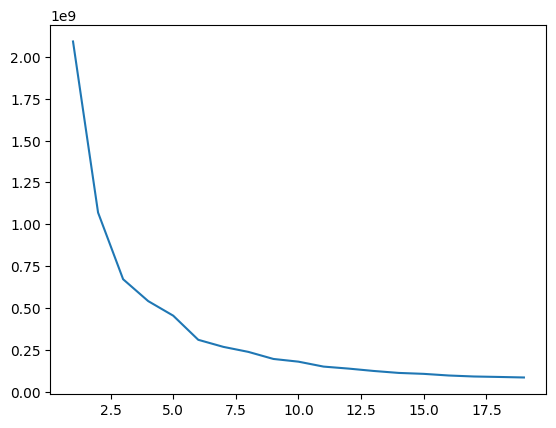

In [9]:
DistanceList = []
for i in range(1,20): #測試將資料分為1~10群
    KM = KMeans(n_clusters=i, n_init='auto', random_state=1)
    KM.fit(all_dot)
    DistanceList.append(KM.inertia_) #求出每個Cluster內的資料與其中心點之平方距離和，並用List記錄起來
plt.plot(range(1,20), DistanceList)
plt.show()

In [13]:

# 定義數據 (座標)
# 使用 K-means 進行聚類
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(all_dot_array)
centroids = kmeans.cluster_centers_

# 群的標籤
labels = kmeans.labels_

# 提取每個群的數據點
clusters = {i: all_dot_array[labels == i] for i in range(kmeans.n_clusters)}

count_dot = Counter(all_dot)

max_cor = 0
max_freq = 0
clusters_core = [] # 8個熱區分別之最熱點
for j in range(8):
    clusters_j = tuple(tuple(i) for i in clusters[j])
    max_cor = 0
    max_freq = 0
    for cor, freq in count_dot.items():
        if (cor in clusters_j) & (freq > max_freq):
            max_freq = freq
            max_cor = cor
    clusters_core.append(max_cor)

clusters_core = np.array(clusters_core) # 轉換np方便畫圖

c:\Users\User\envs\face_reg\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\User\envs\face_reg\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


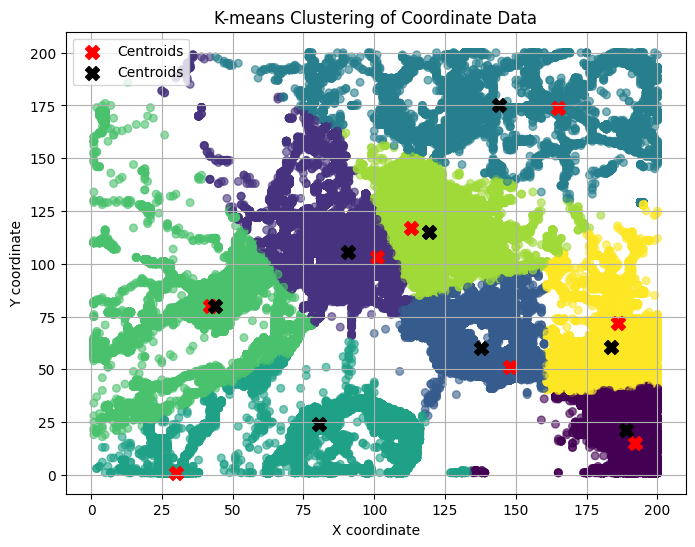

群的中心點座標：
[[192  15]
 [101 103]
 [148  51]
 [165 174]
 [ 30   1]
 [ 42  80]
 [113 117]
 [186  72]]


In [14]:
# # 畫出聚類結果
plt.figure(figsize=(8, 6))
plt.scatter(all_dot_array[:, 0], all_dot_array[:, 1], c=kmeans.labels_, s=30, cmap='viridis', alpha=0.6)
plt.scatter(clusters_core[:, 0], clusters_core[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.title("K-means Clustering of Coordinate Data")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.grid(True)
plt.show()

# # 打印每個群的中心點
print("群的中心點座標：")
print(clusters_core)

### 標上id之生活圈類別

In [16]:
df_home = pd.read_csv('D_home&work.csv')   ## 先前得出之uid家和工作地座標
df_home['home'] = df_home['home'].apply(eval)
df_home['cat'] = "n"
for index, item in df_home.iterrows():
    coord_array = np.round(centroids).astype(int)
    # home_cor = ast.literal_eval(item['home'])
    home_cor = item['home']
    target_array = np.array(home_cor)
    # 計算歐式距離，使用 numpy 的向量化操作
    distances = np.linalg.norm(coord_array - target_array, axis=1)
    closest_index = np.argmin(distances)
    # print(closest_index)
    # print(index)
    df_home.at[index, 'cat'] = closest_index
# # 最接近的座標和距離
#     closest_coord = centroids[closest_index]
#     closest_distance = distances[closest_index]

### 替test_data標上類別

In [18]:
test_df['cat'] = "n"
for index, item in test_df.iterrows():
    id = item['uid']
    home_id = df_home[df_home['uid'] == id]
    test_df.at[index, 'cat'] = int(home_id['cat'])

In [19]:
test_df

,uid,d,t,x,y,coordinate,cat
0,0,0,13,133,103,"(133, 103)",6
1,0,0,14,143,98,"(143, 98)",6
2,0,0,16,162,99,"(162, 99)",6
3,0,0,17,149,97,"(149, 97)",6
4,0,0,18,144,98,"(144, 98)",6
...,...,...,...,...,...,...,...
4352103,2999,56,41,75,95,"(75, 95)",1
4352104,2999,56,42,76,96,"(76, 96)",1
4352105,2999,56,43,75,95,"(75, 95)",1
4352106,2999,56,44,75,96,"(75, 96)",1


In [20]:
uids = test_df['uid'].unique()
len(uids)

2991

### 找出誰是宅泡

In [21]:
def is_otaku(test_df_id, home_cor, uid):
    lenth, count = 0, 0
    for index, item in test_df_id.iterrows():
            lenth += 1
            x = test_df_id.loc[index]
            cor = x['coordinate']
            if (cor == home_cor) is True:
                count += 1

    if lenth == 0:
        acc = 0
    else :
        acc = count / lenth
            
    if acc >= 0.5:
        return 'yes'
    else:
        return acc,count,cor,home_cor
    
uids = test_df['uid'].unique()
otaku_person = []
out_person = []
for uid in uids:
        df_uid = df_home[df_home['uid'] == uid]
        home_cor = df_uid['home'].iloc[0]  # 只取出tuple,避免取出物件
        test_df_id = test_df[test_df['uid'] == uid]
        if is_otaku(test_df_id, home_cor, uid) == 'yes':
            otaku_person.append(uid)
        else:
            out_person.append(uid)

In [52]:
len(uids)

2991

In [22]:
len(out_person) , len(otaku_person)

(2796, 195)

### 排除睡覺時段外出人之預測

In [23]:
train_df = test_df[test_df['uid'].isin(out_person)]
train_df = train_df[(train_df['t'] >= 20) & (train_df['t'] <= 44)]

In [24]:
X_test = df[df['uid'].isin(out_person)]
X_test = X_test[X_test['d'].apply(is_weekend)]  # 篩選出假日資料
X_test = X_test[X_test['uid'] < 3000]  # 取前3000筆用戶
X_test = X_test[X_test['d'] >= 60]  # 篩選出1~60天的資料
X_test['coordinate'] = list(zip(X_test['x'], X_test['y'])) # 結合XY座標
X_test = X_test[  (X_test['t'] <= 44) & (X_test['t'] >= 20)  ]

X_test['cat'] = "n"
for index, item in X_test.iterrows():
    id = item['uid']
    home_id = df_home[df_home['uid'] == id]
    X_test.at[index, 'cat'] = int(home_id['cat'])

In [47]:
test = X_test
test

,uid,d,t,x,y,coordinate,cat,prediction
1457,0,62,21,140,105,"(140, 105)",6,"(140, 105)"
1458,0,62,22,138,123,"(138, 123)",6,"(138, 123)"
1459,0,62,23,116,134,"(116, 134)",6,"(116, 134)"
1460,0,62,24,118,132,"(118, 132)",6,"(118, 132)"
1461,0,62,25,135,122,"(135, 122)",6,"(135, 122)"
...,...,...,...,...,...,...,...,...
4352348,2999,70,32,75,95,"(75, 95)",1,"(75, 95)"
4352349,2999,70,34,76,96,"(76, 96)",1,"(76, 96)"
4352350,2999,70,37,76,96,"(76, 96)",1,"(76, 96)"
4352351,2999,70,38,76,96,"(76, 96)",1,"(76, 96)"


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 假設你的 DataFrame 是 df_home
# 將座標轉換成 x 和 y 列

# 特徵與目標變數
X = train_df[['uid', 't', 'cat']]  # 使用 t 和 cat 作為特徵
y = train_df[['x', 'y']]    # 目標是 x 和 y 座標

# 分割訓練集和測試集
X_train = X
y_train = y

# 訓練 KNN 模型
knn = KNeighborsRegressor(n_neighbors=3)  # 可以根據需要調整 n_neighbors
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [27]:
x_test = test[['uid', 't', 'cat']]
y_test = test[['x', 'y']]

In [28]:
# 預測
y_pred = knn.predict(x_test)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

y_pred = np.round(y_pred).astype(int)

lenth = 0
count = 0
for i in range(len(y_test)):
    lenth += 1
    if tuple(y_pred[i]) == tuple(y_test.values[i]):
        count += 1

print(count / lenth)

# 檢查部分預測結果
for i in range(5):
    print(f"實際座標: {y_test.iloc[i].values}, 預測座標: {y_pred[i]}")

Mean Squared Error: 300.12109799805216
0.06579998668353419
實際座標: [140 105], 預測座標: [145 103]
實際座標: [138 123], 預測座標: [133 106]
實際座標: [116 134], 預測座標: [133 110]
實際座標: [118 132], 預測座標: [126 111]
實際座標: [135 122], 預測座標: [119 137]


In [ ]:
# y_test['coordinate'] = list(zip(y_test['x'], y_test['y'])) # 結合XY座標

In [58]:
X_test['prediction'] = 'n'
for index, item in X_test.iterrows():
        iloc_value = X_test.index.get_loc(index)
        pre = y_pred[iloc_value]
        X_test.at[index, 'prediction'] = tuple(pre)

In [59]:
out_daytime_df = X_test
out_daytime_df
# 排除睡覺時段之外出人預測

,uid,d,t,x,y,coordinate,cat,prediction
1457,0,62,21,140,105,"(140, 105)",6,"(145, 103)"
1458,0,62,22,138,123,"(138, 123)",6,"(133, 106)"
1459,0,62,23,116,134,"(116, 134)",6,"(133, 110)"
1460,0,62,24,118,132,"(118, 132)",6,"(126, 111)"
1461,0,62,25,135,122,"(135, 122)",6,"(119, 137)"
...,...,...,...,...,...,...,...,...
4352348,2999,70,32,75,95,"(75, 95)",1,"(75, 96)"
4352349,2999,70,34,76,96,"(76, 96)",1,"(75, 95)"
4352350,2999,70,37,76,96,"(76, 96)",1,"(76, 96)"
4352351,2999,70,38,76,96,"(76, 96)",1,"(76, 94)"


### 外出人之睡覺時間補值(家)

In [32]:
out_slp_df = df[df['uid'].isin(out_person)]
out_slp_df = out_slp_df[(out_slp_df['t'] < 20) | (out_slp_df['t'] > 44)]
out_slp_df = out_slp_df[out_slp_df['d'].apply(is_weekend)]  # 篩選出假日資料
out_slp_df = out_slp_df[out_slp_df['uid'] < 3000]  # 取前3000筆用戶
out_slp_df = out_slp_df[out_slp_df['d'] >= 60]  # 篩選出1~60天的資料
out_slp_df['coordinate'] = list(zip(out_slp_df['x'], out_slp_df['y'])) # 結合XY座標

In [33]:
out_slp_df['prediction'] = 'n'
for index, item in out_slp_df.iterrows():
    uid = out_slp_df.loc[index]['uid']
    id_home = df_home[df_home['uid'] == uid]
    home = id_home['home'].iloc[0]
    out_slp_df.at[index, 'prediction'] = home

In [34]:
out_slp_df

,uid,d,t,x,y,coordinate,prediction
1448,0,62,10,118,96,"(118, 96)","(143, 98)"
1449,0,62,11,143,98,"(143, 98)","(143, 98)"
1450,0,62,13,140,110,"(140, 110)","(143, 98)"
1451,0,62,14,136,115,"(136, 115)","(143, 98)"
1452,0,62,15,119,132,"(119, 132)","(143, 98)"
...,...,...,...,...,...,...,...
4352333,2999,70,15,75,96,"(75, 96)","(75, 96)"
4352334,2999,70,16,76,96,"(76, 96)","(75, 96)"
4352335,2999,70,17,75,95,"(75, 95)","(75, 96)"
4352336,2999,70,18,76,97,"(76, 97)","(75, 96)"


### 宅泡

In [35]:
otaku_df = df[df['uid'].isin(otaku_person)]
otaku_df = otaku_df[otaku_df['d'].apply(is_weekend)]  # 篩選出假日資料
otaku_df = otaku_df[otaku_df['uid'] < 3000]  # 取前3000筆用戶
otaku_df = otaku_df[otaku_df['d'] >= 60]  # 篩選出1~60天的資料
otaku_df['coordinate'] = list(zip(otaku_df['x'], otaku_df['y'])) # 結合XY座標

In [36]:
otaku_df['prediction'] = 'n'
for index, item in otaku_df.iterrows():
        uid = otaku_df.loc[index]['uid']
        id_home = df_home[df_home['uid'] == uid]
        home = id_home['home'].iloc[0]
        otaku_df.at[index, 'prediction'] = home

In [37]:
## 宅泡
otaku_df

,uid,d,t,x,y,coordinate,prediction
16049,11,62,1,159,52,"(159, 52)","(159, 52)"
16050,11,62,2,159,52,"(159, 52)","(159, 52)"
16051,11,62,3,159,52,"(159, 52)","(159, 52)"
16052,11,62,6,159,52,"(159, 52)","(159, 52)"
16053,11,62,7,159,52,"(159, 52)","(159, 52)"
...,...,...,...,...,...,...,...
4349106,2997,70,38,94,98,"(94, 98)","(94, 98)"
4349107,2997,70,39,94,98,"(94, 98)","(94, 98)"
4349108,2997,70,43,94,98,"(94, 98)","(94, 98)"
4349109,2997,70,44,94,99,"(94, 99)","(94, 98)"


### 合併

In [38]:
import geobleu

In [60]:
## 61~75天所有欲預測資料,檢查合併後row數量是否正確
all_pre_df = df[df['d'].apply(is_weekend)] 
all_pre_df = all_pre_df[all_pre_df['uid'] < 3000]
all_pre_df = all_pre_df[all_pre_df['d'] >= 60]  # 篩選出1~60天的資料
pp = all_pre_df['uid'].unique()
all_pre_df

,uid,d,t,x,y
1448,0,62,10,118,96
1449,0,62,11,143,98
1450,0,62,13,140,110
1451,0,62,14,136,115
1452,0,62,15,119,132
...,...,...,...,...,...
4352348,2999,70,32,75,95
4352349,2999,70,34,76,96
4352350,2999,70,37,76,96
4352351,2999,70,38,76,96


In [61]:
combined_df = pd.concat([otaku_df, out_daytime_df, out_slp_df], ignore_index=False)

In [62]:
combined_df = combined_df.sort_index()

In [63]:
combined_df = combined_df.drop(columns = ['cat'])

In [64]:
combined_df

,uid,d,t,x,y,coordinate,prediction
1448,0,62,10,118,96,"(118, 96)","(143, 98)"
1449,0,62,11,143,98,"(143, 98)","(143, 98)"
1450,0,62,13,140,110,"(140, 110)","(143, 98)"
1451,0,62,14,136,115,"(136, 115)","(143, 98)"
1452,0,62,15,119,132,"(119, 132)","(143, 98)"
...,...,...,...,...,...,...,...
4352348,2999,70,32,75,95,"(75, 95)","(75, 96)"
4352349,2999,70,34,76,96,"(76, 96)","(75, 95)"
4352350,2999,70,37,76,96,"(76, 96)","(76, 96)"
4352351,2999,70,38,76,96,"(76, 96)","(76, 94)"


In [ ]:
# combined_df.to_csv('C_61-75_holiday.csv', index = True)

In [65]:
uids_com = combined_df['uid'].unique()
len(uids_com)

2939

In [66]:
total_geo = 0
total_dtw = 0
for uid in uids_com:
    if uid < 1000:
        df_uid = combined_df[combined_df['uid'] == uid]
        true_all = []
        prediction_all = []
        for index, item in df_uid.iterrows():
            # predcition = ast.literal_eval(item['prediction'])  # 預設為str，先換成tuple
                prediction = item['prediction']
                d = item['d']
                t = item['t']
                True_x = item['x']
                True_y = item['y']
                pre_x = prediction[0]
                pre_y = prediction[1]
                true_ = (d, t, True_x, True_y)
                pre_ = (d, t, pre_x, pre_y)
                true_all.append(true_)
                prediction_all.append(pre_)
        geobleu_val = geobleu.calc_geobleu(true_all, prediction_all, processes=3)

        dtw_val = geobleu.calc_dtw(true_all, prediction_all, processes=3)

        total_geo += geobleu_val
        total_dtw += dtw_val

In [68]:
print(total_geo / 1000)
print(total_dtw / 1000)

0.22396953081946405
72.60292616341361
